# Course : Introduction to TensorFlow for Artificial Intelligence, Machine Learning, and Deep Learning
## Week 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import tensorflow as tf

2022-06-21 16:00:46.728629: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-06-21 16:00:46.728675: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


### 1.1 The 'Hello World' of Neural Networks :

In [2]:
model = tf.keras.Sequential([tf.keras.layers.Dense(units=1, input_shape=[1])])
model.compile(optimizer='sgd', loss='mean_squared_error')

xData = np.array([-1.0, 0.0, 1.0, 2.0, 3.0, 4.0], dtype=float)
yData = np.array([-3.0, -1.0, 1.0, 3.0, 5.0, 7.0], dtype=float)

model.fit(xData, yData, epochs=500)

print(model.predict([10.0]))

2022-06-20 04:03:02.972525: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-20 04:03:02.972565: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-20 04:03:02.972589: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-839790): /proc/driver/nvidia/version does not exist
2022-06-20 04:03:02.973019: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/500
1/1 [==============================] - 1s 1s/step - loss: 6.2963
Epoch 2/500
1/1 [==============================] - 0s 4ms/step - loss: 5.1388
Epoch 3/500
1/1 [==============================] - 0s 3ms/step - loss: 4.2242
Epoch 4/500
1/1 [==============================] - 0s 3ms/step - loss: 3.5010
Epoch 5/500
1/1 [==============================] - 0s 3ms/step - loss: 2.9284
Epoch 6/500
1/1 [==============================] - 0s 3ms/step - loss: 2.4743
Epoch 7/500
1/1 [==============================] - 0s 3ms/step - loss: 2.1135
Epoch 8/500
1/1 [==============================] - 0s 4ms/step - loss: 1.8262
Epoch 9/500
1/1 [==============================] - 0s 4ms/step - loss: 1.5969
Epoch 10/500
1/1 [==============================] - 0s 3ms/step - loss: 1.4131
Epoch 11/500
1/1 [==============================] - 0s 3ms/step - loss: 1.2654
Epoch 12/500
1/1 [==============================] - 0s 3ms/step - loss: 1.1459
Epoch 13/500
1/1 [==============================] - 0s 3ms/ste

## Week 2

### 2.1 Introduction to Computer Vision

#### We will be using the Fashion MNIST dataset

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [7]:
labels = ['T-shirt/Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   

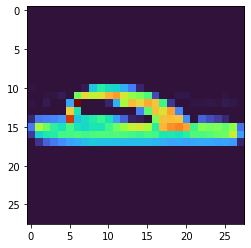

In [4]:
np.set_printoptions(linewidth=320)

print(train_images[23324])
plt.imshow(train_images[23324], cmap='turbo')

1 Trouser


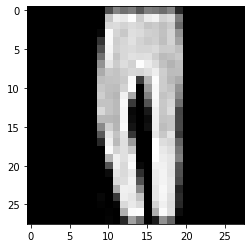

In [5]:
plt.imshow(train_images[49840], cmap='gray')
print(train_labels[49840], labels[train_labels[49840]])

6 Shirt


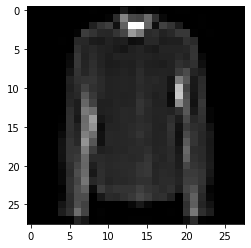

In [6]:
plt.imshow(train_images[49440], cmap='gray')
print(train_labels[49440], labels[train_labels[49440]])

You'll notice that all of the values in the number are between 0 and 255. If you are training a neural network especially in image processing, for various reasons it will usually learn better if you scale all values to between 0 and 1. It's a process called _normalization_ and fortunately in Python, it's easy to normalize an array without looping. You do it like this:

In [7]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [8]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(128, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)

2022-06-20 14:24:54.320649: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-06-20 14:24:54.320690: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-06-20 14:24:54.320711: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (codespaces-839790): /proc/driver/nvidia/version does not exist
2022-06-20 14:24:54.321157: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


[Sequential](https://keras.io/api/models/sequential/): That defines a sequence of layers in the neural network.

[Flatten](https://keras.io/api/layers/reshaping_layers/flatten/): Remember earlier where our images were a 28x28 pixel matrix when you printed them out? Flatten just takes that square and turns it into a 1-dimensional array of length 784.

[Dense](https://keras.io/api/layers/core_layers/dense/): Adds a layer of neurons

Each layer of neurons need an [activation function](https://keras.io/api/layers/activations/) to tell them what to do. There are a lot of options, but just use these for now: 

[ReLU](https://keras.io/api/layers/activations/#relu-function) effectively means:

```Python
if x > 0: 
  return x

else: 
  return 0
```

In other words, it only passes values 0 or greater to the next layer in the network.

[Softmax](https://keras.io/api/layers/activations/#softmax-function) takes a list of values and scales these so the sum of all elements will be equal to 1. When applied to model outputs, you can think of the scaled values as the probability for that class. For example, in your classification model which has 10 units in the output dense layer, having the highest value at `index = 4` means that the model is most confident that the input clothing image is a coat. If it is at index = 5, then it is a sandal, and so forth. See the short code block below which demonstrates these concepts. You can also watch this [lecture](https://www.youtube.com/watch?v=LLux1SW--oM&ab_channel=DeepLearningAI) if you want to know more about the Softmax function and how the values are computed.


In [9]:
# Declare sample inputs and convert to a tensor
inputs = np.array([[1.0, 3.0, 4.0, 2.0]])
inputs = tf.convert_to_tensor(inputs)
print(f'input to softmax function: {inputs.numpy()}')

# Feed the inputs to a softmax activation function
outputs = tf.keras.activations.softmax(inputs)
print(f'output of softmax function: {outputs.numpy()}')

# Get the sum of all values after the softmax
sum = tf.reduce_sum(outputs)
print(f'sum of outputs: {sum}')

# Get the index with highest value
prediction = np.argmax(outputs)
print(f'class with highest probability: {prediction}')

input to softmax function: [[1. 3. 4. 2.]]
output of softmax function: [[0.0320586  0.23688282 0.64391426 0.08714432]]
sum of outputs: 1.0
class with highest probability: 2


In [10]:
model.compile(
    optimizer=tf.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [11]:
model.fit(train_images, train_labels, epochs=5)

2022-06-20 14:25:24.427317: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4943 - accuracy: 0.8271
Epoch 2/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3735 - accuracy: 0.8644
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3345 - accuracy: 0.8780
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3139 - accuracy: 0.8854
Epoch 5/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2963 - accuracy: 0.8903


In [12]:
model.evaluate(test_images, test_labels)

  1/313 [..............................] - ETA: 41s - loss: 0.2894 - accuracy: 0.9062

2022-06-20 14:25:54.042654: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 1s 1ms/step - loss: 0.3497 - accuracy: 0.8762


[0.3496550917625427, 0.8762000203132629]

In [13]:
classifications = model.predict(test_images)

classifications[0]

 98/313 [========>.....................] - ETA: 0s

2022-06-20 14:26:17.999059: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 31360000 exceeds 10% of free system memory.


313/313 [==============================] - 0s 1ms/step


array([2.99173207e-05, 3.76577248e-07, 1.16567404e-04, 1.44963838e-06, 4.70642362e-06, 4.35593277e-02, 4.90691491e-05, 3.38718928e-02, 5.52820624e-04, 9.21813786e-01], dtype=float32)

In [14]:
classifications[0].max()

0.9218138

In [15]:
print(f"label index : {test_labels[0]}, label : {labels[test_labels[0]]}")

# 9th index has highest probability, therefore result is 9.

label index : 9, label : Ankle boot


In [18]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)

model.compile(
    optimizer=tf.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

model.fit(train_images, train_labels, epochs=5)

Epoch 1/5


2022-06-20 14:31:00.002402: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


1875/1875 [==============================] - 4s 2ms/step - loss: 0.4739 - accuracy: 0.8309
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3580 - accuracy: 0.8692
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3224 - accuracy: 0.8818
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3001 - accuracy: 0.8893
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2811 - accuracy: 0.8953


In [22]:
model.evaluate(test_images, test_labels)
classifications = model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [23]:
print(f"Predicted label : {labels[np.argmax(classifications[9])]}, Actual Label : {labels[test_labels[9]]}")

Predicted label : Sneaker, Actual Label : Sneaker


In [24]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(1024, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)

model.compile(
    optimizer=tf.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

model.fit(train_images, train_labels, epochs=5)
model.evaluate(test_images, test_labels)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4702 - accuracy: 0.8314
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3576 - accuracy: 0.8696
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3225 - accuracy: 0.8812
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2965 - accuracy: 0.8894
Epoch 5/5
313/313 [==============================] - 1s 2ms/step - loss: 0.3496 - accuracy: 0.8694


[0.34962698817253113, 0.8694000244140625]

In [26]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(1024, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)

model.compile(
    optimizer=tf.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

model.fit(train_images, train_labels, epochs=10)
model.evaluate(test_images, test_labels)

Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4695 - accuracy: 0.8317
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3599 - accuracy: 0.8681
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3218 - accuracy: 0.8814
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2991 - accuracy: 0.8900
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2798 - accuracy: 0.8955
Epoch 6/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2636 - accuracy: 0.9019
Epoch 7/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2524 - accuracy: 0.9065
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2384 - accuracy: 0.9108
Epoch 9/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2278 - accuracy: 0.9147
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.3263 

[0.3262684941291809, 0.8865000009536743]

In [27]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(1024, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)

model.compile(
    optimizer=tf.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

model.fit(train_images, train_labels, epochs=30)
model.evaluate(test_images, test_labels)

Epoch 1/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4728 - accuracy: 0.8314
Epoch 2/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3603 - accuracy: 0.8678
Epoch 3/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3202 - accuracy: 0.8817
Epoch 4/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2952 - accuracy: 0.8900
Epoch 5/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2777 - accuracy: 0.8968
Epoch 6/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2628 - accuracy: 0.9018
Epoch 7/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2532 - accuracy: 0.9060
Epoch 8/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2401 - accuracy: 0.9085
Epoch 9/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2293 - accuracy: 0.9132
Epoch 10/30
1875/1875 [==============================] - 6s 3ms/step - loss: 0.220

[0.42437782883644104, 0.8956000208854675]

In [8]:
# Callback function for high epochs

class callBackMNIST(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs = {}):
        if (logs.get('loss') <= 0.4):
            print("\nLoss is lower than 0.4 so cancelling training!")
            self.model.stop_training = True


callback = callBackMNIST()

In [9]:
model = tf.keras.models.Sequential(
    [
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(512, activation=tf.nn.relu),
        tf.keras.layers.Dense(10, activation=tf.nn.softmax),
    ]
)

model.compile(
    optimizer=tf.optimizers.Adam(),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [13]:
model.fit(train_images, train_labels, epochs=50, callbacks=[callback])

Epoch 1/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4084 - accuracy: 0.8633
Epoch 2/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4082 - accuracy: 0.8620
Epoch 3/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4057 - accuracy: 0.8623
Epoch 4/50
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4011 - accuracy: 0.8635
Epoch 5/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4084 - accuracy: 0.8640
Epoch 6/50
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4205 - accuracy: 0.8609
Epoch 7/50
1859/1875 [============================>.] - ETA: 0s - loss: 0.3998 - accuracy: 0.8645
Loss is lower than 0.4 so cancelling training!
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3996 - accuracy: 0.8645


In [14]:
model.evaluate(test_images, test_labels)

313/313 [==============================] - 1s 2ms/step - loss: 0.5937 - accuracy: 0.8412


[0.593691349029541, 0.8411999940872192]